# Deep Learning Model for MNIST Data Set with KERAS
In diesem Notebook erstellen wir ein erstes Deep Learning Model für den MNIST Data Set.

## LOADING PACKAGES

In [2]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras

import matplotlib
import matplotlib.pyplot as plt # plotting library
%matplotlib inline
matplotlib.get_backend()

'module://matplotlib_inline.backend_inline'

## LOADING DATA

In [3]:
# import dataset
from keras.datasets import mnist

# load dataset
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [4]:
print("Shape x_train: {}".format(x_train.shape))
print("Shape x_test: {}".format(x_test.shape))

Shape x_train: (60000, 28, 28)
Shape x_test: (10000, 28, 28)


## Data Visualisation

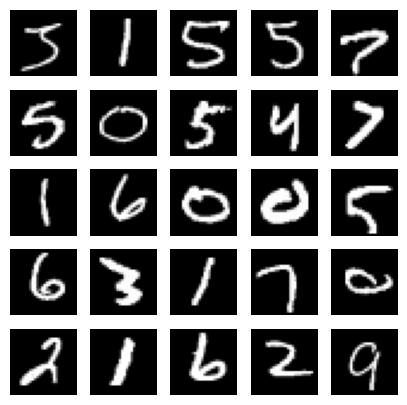

In [5]:
# sample 25 mnist digits from train dataset
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]


# plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')

plt.show()
plt.savefig("mnist-samples.png")
plt.close('all')

## Pre-Processing a data
### Reshaping the values

In [6]:
x_train = x_train.reshape((60000,28*28))
x_test = x_test.reshape((10000,28*28))

In [7]:
print("Shape x_train: {}".format(x_train.shape))
print("Shape x_test: {}".format(x_test.shape))

Shape x_train: (60000, 784)
Shape x_test: (10000, 784)


### Scaling the values

In [8]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [9]:
x_train[0:5,:]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### Forming the output variables

In [10]:
# save each number as one-hot category
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [11]:
y_train[0:5,:]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

## Model
### Fixing the structure of the model

In [12]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(256, activation='relu', input_shape=(28*28,))) #hidden layer 1
model.add(tf.keras.layers.Dense(64,activation = 'relu')) #hidden layer 2                             #relu ist Aktivierungsfunktion
model.add(tf.keras.layers.Dense(10, activation='softmax')) #output layer


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


In [1]:
# Architektur anzeigen
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)
# Beim None kommt die Batch-Size dann rein

NameError: name 'tf' is not defined

### Compiling the model

In [15]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

### Training the model

In [16]:
history = model.fit(x_train, y_train, epochs=20, batch_size=128,validation_split=0.10) #epochs Durchgänge, Batch-Size Grösse, Split löschen?

Epoch 1/20
422/422 [==============================] - 2s 4ms/step - loss: 0.3038 - accuracy: 0.9125 - val_loss: 0.1148 - val_accuracy: 0.9678
Epoch 2/20
422/422 [==============================] - 1s 3ms/step - loss: 0.1168 - accuracy: 0.9649 - val_loss: 0.0951 - val_accuracy: 0.9717
Epoch 3/20
422/422 [==============================] - 1s 3ms/step - loss: 0.0763 - accuracy: 0.9765 - val_loss: 0.0871 - val_accuracy: 0.9743
Epoch 4/20
422/422 [==============================] - 1s 3ms/step - loss: 0.0556 - accuracy: 0.9826 - val_loss: 0.0779 - val_accuracy: 0.9768
Epoch 5/20
422/422 [==============================] - 1s 3ms/step - loss: 0.0393 - accuracy: 0.9884 - val_loss: 0.0708 - val_accuracy: 0.9800
Epoch 6/20
422/422 [==============================] - 1s 3ms/step - loss: 0.0293 - accuracy: 0.9912 - val_loss: 0.0863 - val_accuracy: 0.9762
Epoch 7/20
422/422 [==============================] - 1s 3ms/step - loss: 0.0230 - accuracy: 0.9930 - val_loss: 0.0800 - val_accuracy: 0.9792
Epoch 

In [17]:
history.history['accuracy'][19] #welchen Batch, was soll gezeigt werden

0.9975185394287109

### Evaluating the model performance


Accuracy during Training :
------------------------------------


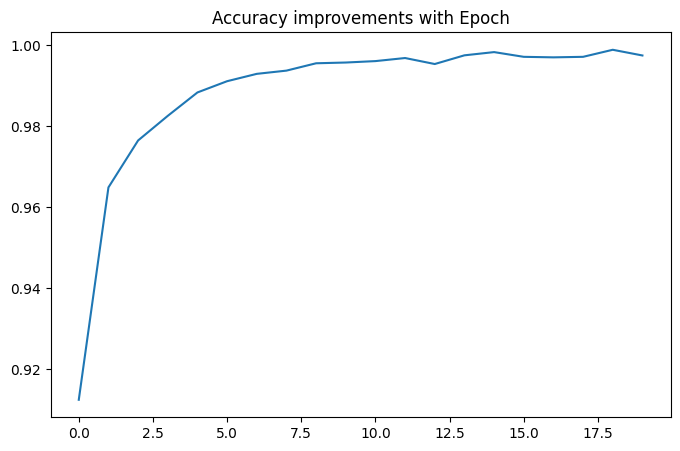

In [18]:
print("\nAccuracy during Training :\n------------------------------------")

#Plot accuracy of the model after each epoch.
pd.DataFrame(history.history)["accuracy"].plot(figsize=(8, 5))
plt.title("Accuracy improvements with Epoch")
plt.show()


In [19]:
#Evaluate the model against the test dataset and print results
print("\nEvaluation against Test Dataset :\n------------------------------------")
model.evaluate(x_test,y_test)


Evaluation against Test Dataset :
------------------------------------
313/313 [==============================] - 0s 1ms/step - loss: 0.1017 - accuracy: 0.9796


[0.10167848318815231, 0.9796000123023987]

## REFERENCES
Francois Chollet (2018), Deep Learning with Python, Manning.
Kumaran Ponnambalam (2022), Deep Learning: Model Optimization and Tuning, LinkedIn Learning.